In [42]:
from nilearn.maskers import NiftiMasker, NiftiLabelsMasker
from nilearn.image import load_img
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets, image
from nilearn.maskers import NiftiMasker, NiftiLabelsMasker
from nilearn.image import load_img
from nilearn.surface import vol_to_surf, load_surf_mesh
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting
import seaborn as sns
from nilearn import datasets, image
from scipy import stats
import nibabel as nib
import statsmodels.api as sm
import glob
import os
from pygam import LinearGAM, s, f, GAM
from sklearn.linear_model import LinearRegression
import seaborn as sns
from statsmodels.stats.multitest  import fdrcorrection
from enigmatoolbox.permutation_testing import spin_test, shuf_test

In [43]:
anatomical = pd.read_csv('../../Modules/Figure4/SIGMA_InVivo_Anatomical_Brain_Atlas_Labels.txt', sep='\t')
anatmap = pd.read_csv('../../Modules/Figure4/SIGMA_InVivo_Anatomical_Brain_Atlas_ListOfStructures.csv')
left_anatmap = anatmap.loc[:, ['Left Hemisphere Label', 'Matter', 'Territories', 'System', 'Region of interest']] 
right_anatmap = anatmap.loc[:, ['Right Hemisphere Label', 'Matter', 'Territories', 'System', 'Region of interest']]
left_anatmap.columns = ['Label', 'Matter', 'Territories', 'System', 'Region of interest']
right_anatmap.columns = ['Label', 'Matter', 'Territories', 'System', 'Region of interest']
anatmap = pd.concat([left_anatmap, right_anatmap])
anatomical = pd.merge(anatomical, anatmap, left_on='0', right_on='Label')
anatomical = anatomical.sort_values('Label').reset_index(drop=True)
anatomical = anatomical[anatomical.System!='CSF']
age = pd.read_csv('../../Modules/Figure4/standardRat_20220408.tsv', sep='\t')
H_anat = pd.read_csv('../../Derivatives/Figure4/H.csv')

In [44]:
regions = ['Primary Visual Cortex', 'Primary Auditory Cortex',
           'Lateral Primary Auditory Cortex',  'Primary Somatosensory Cortex', 'Secondary Somatosensory Cortex', 
           'Primary Motor Cortex', 'Secondary Motor Cortex', 'Lateral Parietal Associative Cortex', 'Medial Parietal Associative Cortex', 'PreLimbic System','Orbitofrontal Region',
           'Dorso Lateral Orbital Cortex', 'Temporal Associative Cortex', 'Primary Cingular Cortex',  'Retrosplenial Granular Cortex Part A',
           'Retrosplenial Granular Cortex Part B', 'Perirhinal Cortex']
group = ['Visual', 'Auditory','Auditory','S1','S2','M1','M2','Parietal','Parietal','PL','OFC','OFC', 'IT','ACC','Retro','Retro', 'Peri']

In [45]:
saaxis = pd.DataFrame(np.unique(group))
saaxis.columns = ['region']
#saaxis['sa']  = [10,2,9,7,8,12,6,11,5,3,4,1]
saaxis['sa']  = [11,2,10,7,8,9,13,6,12,5,3,4,1]
sa = []
for x in anatomical['Region of interest']:
    ids = 0
    for i,y in enumerate(regions):
        if x == y:
            print(x)
            sa.append(saaxis[saaxis.region==group[i]].sa.values[0])
            ids += 1
    if ids == 0:
        sa.append(-1)

Dorso Lateral Orbital Cortex
Dorso Lateral Orbital Cortex
Lateral Primary Auditory Cortex
Lateral Primary Auditory Cortex
Lateral Parietal Associative Cortex
Lateral Parietal Associative Cortex
Medial Parietal Associative Cortex
Medial Parietal Associative Cortex
Orbitofrontal Region
Orbitofrontal Region
Perirhinal Cortex
Perirhinal Cortex
PreLimbic System
PreLimbic System
Primary Auditory Cortex
Primary Auditory Cortex
Primary Cingular Cortex
Primary Cingular Cortex
Primary Motor Cortex
Primary Motor Cortex
Primary Somatosensory Cortex
Primary Somatosensory Cortex
Primary Visual Cortex
Primary Visual Cortex
Retrosplenial Granular Cortex Part A
Retrosplenial Granular Cortex Part A
Retrosplenial Granular Cortex Part B
Retrosplenial Granular Cortex Part B
Secondary Motor Cortex
Secondary Motor Cortex
Secondary Somatosensory Cortex
Secondary Somatosensory Cortex
Temporal Associative Cortex
Temporal Associative Cortex


In [46]:
H_anat['SubjID'] = [x.replace('_t','') for x in H_anat['H_all233']]
H_anat = pd.merge(H_anat, age, on='SubjID')
H_anat_original = H_anat[H_anat.Age>0]
H_anat_original = H_anat_original[H_anat_original.Age<4].reset_index(drop=True)
H_anat_original.to_csv('../../Derivatives/H_age_original.csv', index=False)
Age = H_anat.Age
Sex = H_anat.Sex

In [47]:
H_anat = H_anat.iloc[:, :232].T
H_anat['sa'] = sa
H_anat = H_anat[H_anat.sa>-1]

In [48]:
df_H = H_anat.sort_values('sa').T.iloc[:-1, :]

In [49]:
df_H['Age'] = Age
df_H['Sex'] =Sex
df_H = df_H[df_H.Age>0]
df_H = df_H[df_H.Age<4].reset_index(drop=True)
df_H.to_csv('../../Derivatives/H_age.csv', index=False)

In [50]:
H_anat

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,sa
H_all21,1.599946,1.560050,1.553308,1.504446,1.551321,1.577273,1.592411,1.537766,1.664918,1.641429,...,1.569574,1.589360,1.663966,1.573076,1.614431,1.611466,1.625625,1.580138,1.592233,9
H_all22,1.590226,1.619099,1.569414,1.511478,1.544812,1.531427,1.510604,1.628124,1.621749,1.563657,...,1.590671,1.540716,1.565820,1.565220,1.633026,1.534104,1.577013,1.546134,1.614131,9
H_all41,1.553680,1.573340,1.606933,1.570366,1.631607,1.556941,1.511916,1.619300,1.605568,1.576405,...,1.586433,1.567217,1.602408,1.575267,1.551397,1.625465,1.631737,1.615797,1.586798,2
H_all42,1.547773,1.553713,1.573508,1.624903,1.615314,1.504820,1.585143,1.609967,1.661017,1.558646,...,1.513449,1.622026,1.590788,1.564398,1.618898,1.560351,1.602545,1.647025,1.596649,2
H_all55,1.613943,1.550970,1.554557,1.552320,1.579957,1.605730,1.589515,1.570643,1.556784,1.591588,...,1.636880,1.613239,1.621611,1.610503,1.587602,1.649426,1.644941,1.593435,1.638980,6
H_all56,1.629643,1.562216,1.598897,1.545489,1.621044,1.568559,1.590060,1.596834,1.535872,1.586966,...,1.552143,1.618243,1.592014,1.631759,1.578237,1.590863,1.627150,1.548510,1.562114,6
H_all61,1.558024,1.616330,1.467763,1.476939,1.549964,1.599598,1.570199,1.529883,1.651698,1.504795,...,1.583341,1.553114,1.546033,1.548510,1.622972,1.569377,1.619921,1.589761,1.547373,6
H_all62,1.526328,1.571689,1.492783,1.459107,1.580245,1.581386,1.606916,1.574797,1.612783,1.570453,...,1.554255,1.645229,1.561799,1.592446,1.535036,1.639040,1.610418,1.598244,1.617743,6
H_all71,1.584015,1.622364,1.546158,1.596558,1.632560,1.567853,1.676545,1.608003,1.640353,1.556970,...,1.554126,1.633013,1.584780,1.609977,1.562532,1.593008,1.582679,1.648853,1.594699,9
H_all72,1.590446,1.641056,1.580626,1.564906,1.634768,1.547713,1.633291,1.639179,1.626402,1.546168,...,1.541299,1.505767,1.598267,1.592782,1.591303,1.584659,1.606035,1.657123,1.547006,9


In [51]:
df_H = H_anat.sort_values('sa').groupby('sa').mean().reset_index().T.iloc[1:,:]
df_H['Age'] = Age
df_H['Sex'] =Sex
df_H = df_H[df_H.Age>0]
df_H = df_H[df_H.Age<4].reset_index(drop=True)
df_H.to_csv('../../Derivatives/H_age_mean.csv', index=False)
H_anat.sort_values('sa').sa.to_csv('../../Derivatives/sa.csv', index=False)

In [52]:
regions_id = []
for i, x in enumerate(anatomical['Region of interest']):
    if x in regions:
        regions_id.append(i)

In [53]:
df_ind = pd.DataFrame(anatomical['Region of interest'].values)
df_ind.columns = ['Region of interest']
df_ind['roi'] = np.zeros(df_ind.shape[0])
for j,region in enumerate(regions):
    reind = []
    for x in anatomical['Region of interest'].unique():
        if region in x:
            df_ind.loc[df_ind['Region of interest']==x, 'roi'] = j+1

In [54]:
H_anat = H_anat.iloc[:, regions_id]

In [55]:
anatomical = anatomical.iloc[regions_id, :].reset_index(drop=True)
anatomical['H'] = H_anat.mean().values
anatomical['Hsd'] = H_anat.sem().values

In [56]:
df = pd.DataFrame()
groups = []
for x,y in zip(regions,group):
    #rois = []
    #for roi in anatomical['Region of interest'].unique():
    #    if x in roi:
    #        rois.append(roi)
    #for roi in rois:
    df = pd.concat([df, anatomical[anatomical['Region of interest']==x]])
    print(anatomical[anatomical['Region of interest']==x].shape)
    groups += list(np.repeat(y, anatomical[anatomical['Region of interest']==x].shape[0]))
df = df.reset_index(drop=True)
df['group'] = groups

(2, 15)
(2, 15)
(2, 15)
(2, 15)
(2, 15)
(2, 15)
(2, 15)
(2, 15)
(2, 15)
(2, 15)
(2, 15)
(2, 15)
(2, 15)
(2, 15)
(2, 15)
(2, 15)
(2, 15)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Visual'),
  Text(1, 0, 'Auditory'),
  Text(2, 0, 'S1'),
  Text(3, 0, 'S2'),
  Text(4, 0, 'Retro'),
  Text(5, 0, 'Parietal'),
  Text(6, 0, 'M1'),
  Text(7, 0, 'M2'),
  Text(8, 0, 'OFC'),
  Text(9, 0, 'IT'),
  Text(10, 0, 'ACC'),
  Text(11, 0, 'Peri'),
  Text(12, 0, 'PL')])

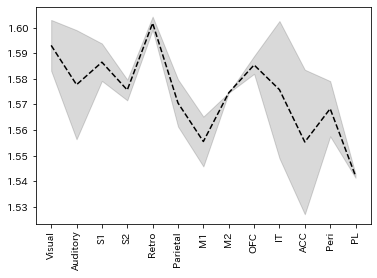

In [57]:
rank = ['Visual','Auditory','S1','S2','Retro','Parietal','M1', 'M2','OFC', 'IT',  'ACC','Peri','PL']
my_palette = {c: sns.color_palette('Blues', n_colors=(3)).as_hex()[c+1] for c in np.arange(2)}
df_mean = df.groupby('group').mean().reset_index()
df_std = df.groupby('group').sem().reset_index()
m = [df_mean[df_mean.group==x]['H'].values[0] for x in rank]
s = [df_std[df_std.group==x]['H'].values[0] for x in rank]
plt.plot(rank, m, '--', color='k')
plt.fill_between(rank, [x+y for x,y in zip(m,s)], [x-y for x,y in zip(m,s)], alpha=0.15,color='k') 
plt.xticks(rotation=90)
#plt.ylim([1.565, 1.595])
#plt.savefig('../figures/Fig1F.eps',  format='eps', bbox_inches='tight')

In [61]:
mmc3 = pd.read_csv('../../Modules/Figure4/mmc3.csv', header=1)
mmc3 = mmc3[mmc3[' mean ']!=' N/D ']
mmc3 = mmc3[mmc3[' mean .2']!=' N/D ']
mmc3 = mmc3[mmc3[' mean ']!=' - ']
mmc3 = mmc3[mmc3[' mean .2']!=' - ']
mmc3 = mmc3[mmc3[' SD ']!=' N/D ']
mmc3 = mmc3[mmc3[' SD .2']!=' N/D ']
mmc3 = mmc3[mmc3[' SD ']!=' - ']
mmc3 = mmc3[mmc3[' SD .2']!=' - ']
mmc3['PVmean'] = [int(x.replace(',', '')) for x in mmc3[' mean ']]
mmc3['SSTmean'] = [int(x.replace(',', '')) for x in mmc3[' mean .2']]
mmc3['PVsd'] = [int(x.replace(',', '')) for x in mmc3[' SD ']]
mmc3['SSTsd'] = [int(x.replace(',', '')) for x in mmc3[' SD .2']]
areas = ['Primary visual area','Primary auditory area','Primary somatosensory area','Supplemental somatosensory area','Primary motor area','Secondary motor area',
         'Posterior parietal association areas','Prelimbic area','Orbital area, medial part','Orbital area, lateral part','Orbital area, ventrolateral part','Temporal association areas',
         'Anterior cingulate area, dorsal part','Anterior cingulate area, ventral part','Retrosplenial area, dorsal part','Retrosplenial area, ventral part','Perirhinal area']
group = ['Visual', 'Auditory','S1','S2','M1','M2', 'Parietal','PL','OFC','OFC','OFC','IT','ACC','ACC','Retro', 'Retro','Peri'] #'Visual','Visual','Visual','Visual', #'Posterolateral visual area', 'Anterolateral visual area','Anteromedial visual area','posteromedial visual area',
df_t = pd.DataFrame()
for x in areas:
    df_t = pd.concat([df_t, mmc3[mmc3['Full name']==x]])
    print(mmc3[mmc3['Full name']==x].shape)
df_t = df_t.reset_index(drop=True)
my_palette = {c: sns.color_palette('Blues', n_colors=(3)).as_hex()[c+1] for c in np.arange(2)}
expression = df_t
expression['group'] = group

(1, 27)
(1, 27)
(1, 27)
(1, 27)
(1, 27)
(1, 27)
(1, 27)
(1, 27)
(1, 27)
(1, 27)
(1, 27)
(1, 27)
(1, 27)
(1, 27)
(1, 27)
(1, 27)
(1, 27)


In [62]:
mmc3['Full name'].unique()

array(['Whole brain', 'Cerebrum', 'Cerebral cortex', 'Cortical plate',
       'Isocortex', 'Frontal pole, cerebral cortex',
       'Frontal pole, layer 1', 'Frontal pole, layer 2/3',
       'Somatomotor areas', 'Primary motor area',
       'Primary motor area, Layer 1', 'Primary motor area, Layer 2/3',
       'Primary motor area, Layer 5', 'Primary motor area, Layer 6',
       'Secondary motor area', 'Secondary motor area, layer 1',
       'Secondary motor area, layer 2/3', 'Secondary motor area, layer 5',
       'Secondary motor area, layer 6', 'Somatosensory areas',
       'Primary somatosensory area',
       'Primary somatosensory area, layer 1',
       'Primary somatosensory area, layer 2/3',
       'Primary somatosensory area, layer 4',
       'Primary somatosensory area, layer 5',
       'Primary somatosensory area, layer 6',
       'Primary somatosensory area, nose',
       'Primary somatosensory area, nose, layer 1',
       'Primary somatosensory area, nose, layer 2/3',
       

In [63]:
df_concat = pd.merge(df.groupby('group').mean().reset_index(), expression.groupby('group').mean().reset_index(), on='group', how='inner')
df_concat_std = pd.merge(df.groupby('group').std().reset_index(), expression.groupby('group').std().reset_index(), on='group', how='inner')
df_concat['inhibitory'] = df_concat.PVmean+df_concat.SSTmean

([<matplotlib.axis.XTick at 0x7facd1ed09a0>,
 [Text(0, 0, 'Visual'),
  Text(1, 0, 'Auditory'),
  Text(2, 0, 'S1'),
  Text(3, 0, 'S2'),
  Text(4, 0, 'Retro'),
  Text(5, 0, 'Parietal'),
  Text(6, 0, 'M1'),
  Text(7, 0, 'M2'),
  Text(8, 0, 'OFC'),
  Text(9, 0, 'ACC'),
  Text(10, 0, 'IT'),
  Text(11, 0, 'Peri'),
  Text(12, 0, 'PL')])

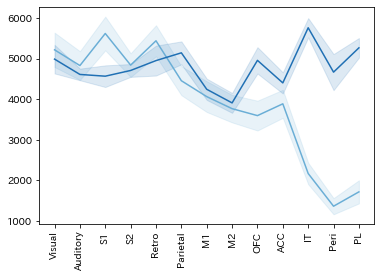

In [64]:
regions = ['Visual','Auditory','S1','S2','Retro','Parietal','M1','M2', 'OFC', 'ACC','IT', 'Peri','PL']
plt.plot([df_concat[df_concat.group==x].PVmean.values[0] for x in regions],color=my_palette[0])
means = [df_concat[df_concat.group==x].PVmean.values[0] for x in regions]
sds = [df_concat[df_concat.group==x].PVsd.values[0] for x in regions]
plt.fill_between(np.arange(13), [x+y for x,y in zip(means,sds)],  [x-y for x,y in zip(means,sds)], alpha=0.15,color=my_palette[0]) 
plt.plot([df_concat[df_concat.group==x].SSTmean.values[0] for x in regions],color=my_palette[1])
means = [df_concat[df_concat.group==x].SSTmean.values[0] for x in regions]
sds = [df_concat[df_concat.group==x].SSTsd.values[0] for x in regions]
plt.fill_between(np.arange(13), [x+y for x,y in zip(means,sds)],  [x-y for x,y in zip(means,sds)], alpha=0.15,color=my_palette[1]) 
plt.xticks(np.arange(len(regions)), regions, rotation=90)
#plt.savefig('../figures/Fig1D.eps',  format='eps', bbox_inches='tight')

0.454593652185898
                            OLS Regression Results                            
Dep. Variable:                      H   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     9.168
Date:                Sat, 03 Feb 2024   Prob (F-statistic):             0.0115
Time:                        09:35:12   Log-Likelihood:                 39.532
No. Observations:                  13   AIC:                            -75.06
Df Residuals:                      11   BIC:                            -73.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5027      0.024  

/Users/monaminishio/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


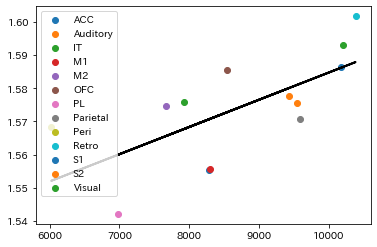

In [65]:
figure = plt.figure()
for i in [x for x in np.arange(df_concat.shape[0])]:
    plt.scatter(df_concat.PVmean[i]+df_concat.SSTmean[i], df_concat['H'][i])
df_x = pd.DataFrame(df_concat.PVmean+df_concat.SSTmean)
df_y = pd.DataFrame(df_concat['H'])
mod = LinearRegression()
mod_lin = mod.fit(df_x, df_y)
y_lin_fit = mod_lin.predict(df_x)
r2_lin = mod.score(df_x, df_y)
plt.plot(df_x, y_lin_fit, color = '#000000', linewidth=2)
print(r2_lin)
X = sm.add_constant(df_concat.PVmean+df_concat.SSTmean)
results = sm.OLS(df_concat['H'],X).fit()
print(results.summary())
#plt.savefig('../figures/Fig3E.eps',  format='eps')
plt.legend(df_concat.group)

In [70]:
# age effect
corrected = pd.read_csv('../../Derivatives/Figure4/corrected_ageeffect.csv')
nocorrected = pd.read_csv('../../Derivatives/Figure4/nocorrected_ageeffect.csv')

In [67]:
template = '../../Modules/Figure4/SIGMA_InVivo_Anatomical_Brain_Atlas.nii'
atlas = image.load_img(template)
atlas_data = atlas.get_fdata()
nodes = np.unique(atlas_data)

In [68]:
anatomical = pd.read_csv('../../Modules/Figure4/SIGMA_InVivo_Anatomical_Brain_Atlas_Labels.txt', sep='\t')
anatmap = pd.read_csv('../../Modules/Figure4/SIGMA_InVivo_Anatomical_Brain_Atlas_ListOfStructures.csv')
left_anatmap = anatmap.loc[:, ['Left Hemisphere Label', 'Matter', 'Territories', 'System', 'Region of interest']] 
right_anatmap = anatmap.loc[:, ['Right Hemisphere Label', 'Matter', 'Territories', 'System', 'Region of interest']]
left_anatmap.columns = ['Label', 'Matter', 'Territories', 'System', 'Region of interest']
right_anatmap.columns = ['Label', 'Matter', 'Territories', 'System', 'Region of interest']
anatmap = pd.concat([left_anatmap, right_anatmap])
anatomical = pd.merge(anatomical, anatmap, left_on='0', right_on='Label')
anatomical = anatomical.sort_values('Label').reset_index(drop=True)
anatomical = anatomical[anatomical.System!='CSF']

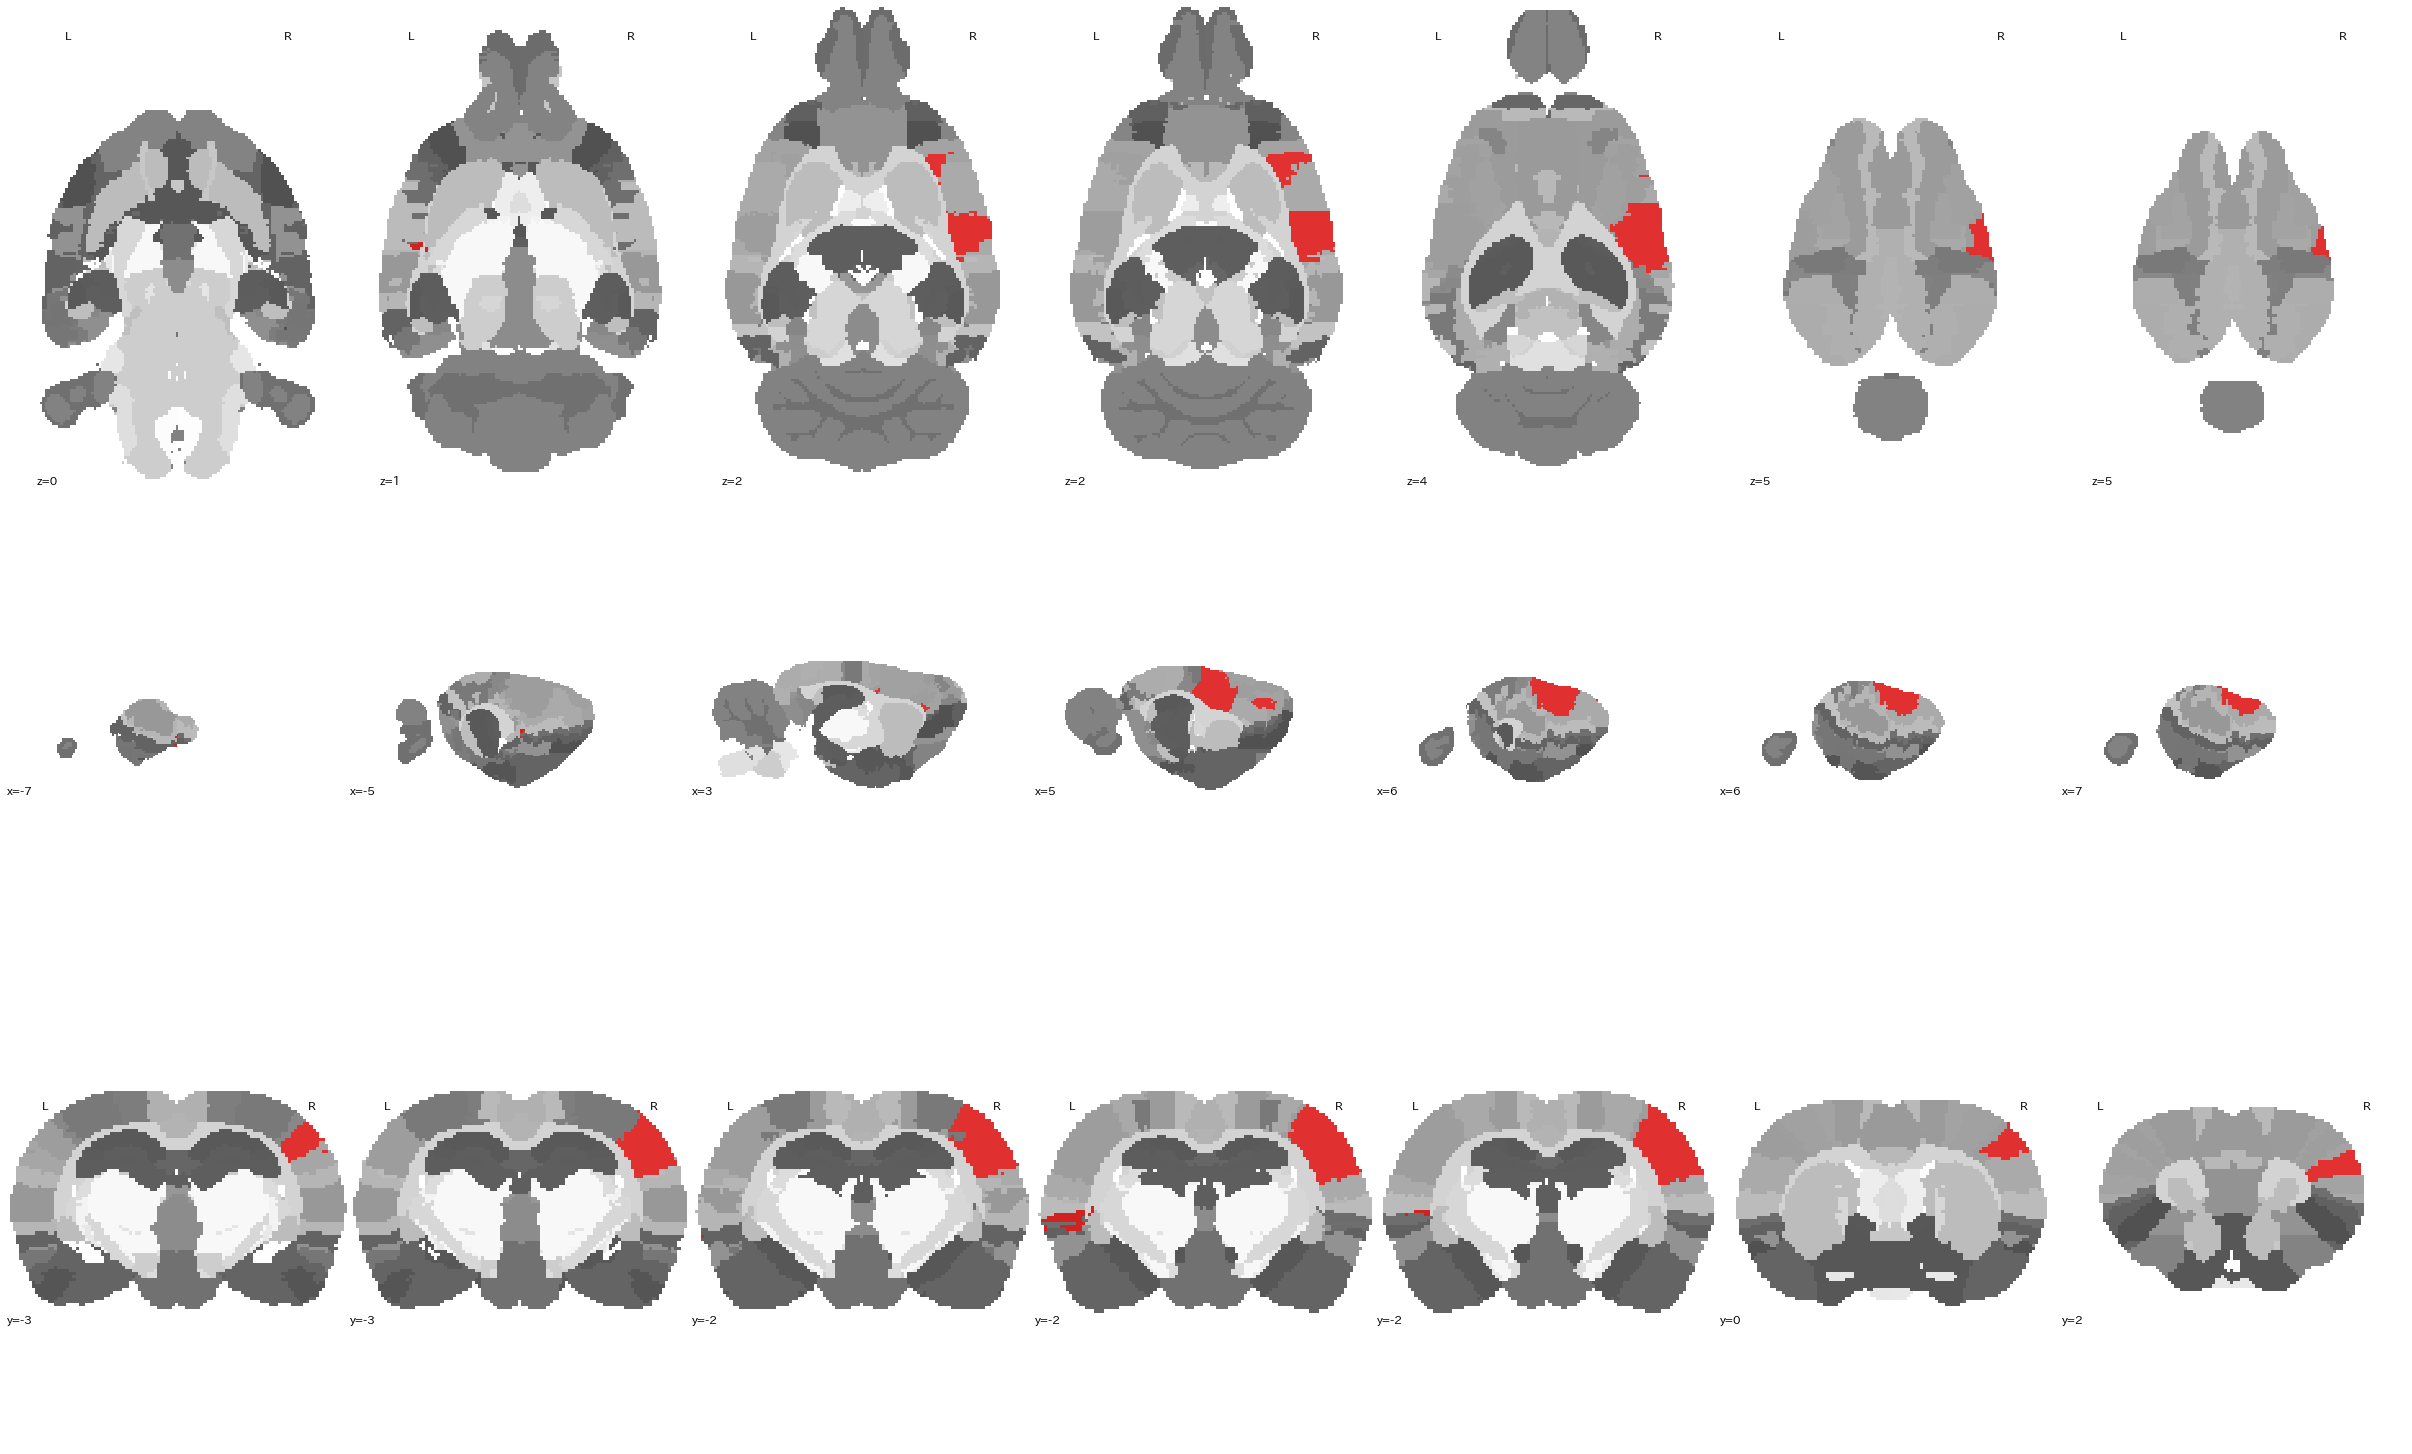

In [71]:
corrected = corrected.fillna(0)
ages = [x if x>0 else 0 for x in corrected.age]
corrected['age'] = ages
data = np.zeros(atlas_data.shape, dtype=np.float32)
cluster = list(corrected.age.values[:230]) + [0,0] + list(corrected.age.values[230:])
for i,n in enumerate(nodes[1:]):
    if i <= 230:
        if anatomical['Territories'].values[i] == 'Cortex':
            data[atlas_data == n] = cluster[i]
    elif i > 232:
        if anatomical['Territories'].values[i-2] == 'Cortex':
            data[atlas_data == n] = cluster[i]
new_img = nib.Nifti1Image(data, atlas.affine, atlas.header)
plotting.plot_roi(new_img, bg_img=template, black_bg=False, threshold=1e-5,  cmap=plotting.cm.red_transparent_full_alpha_range, vmin=0.00, vmax=0.1, display_mode='mosaic') #, output_file='../figures/Fig1E_corrected.eps'

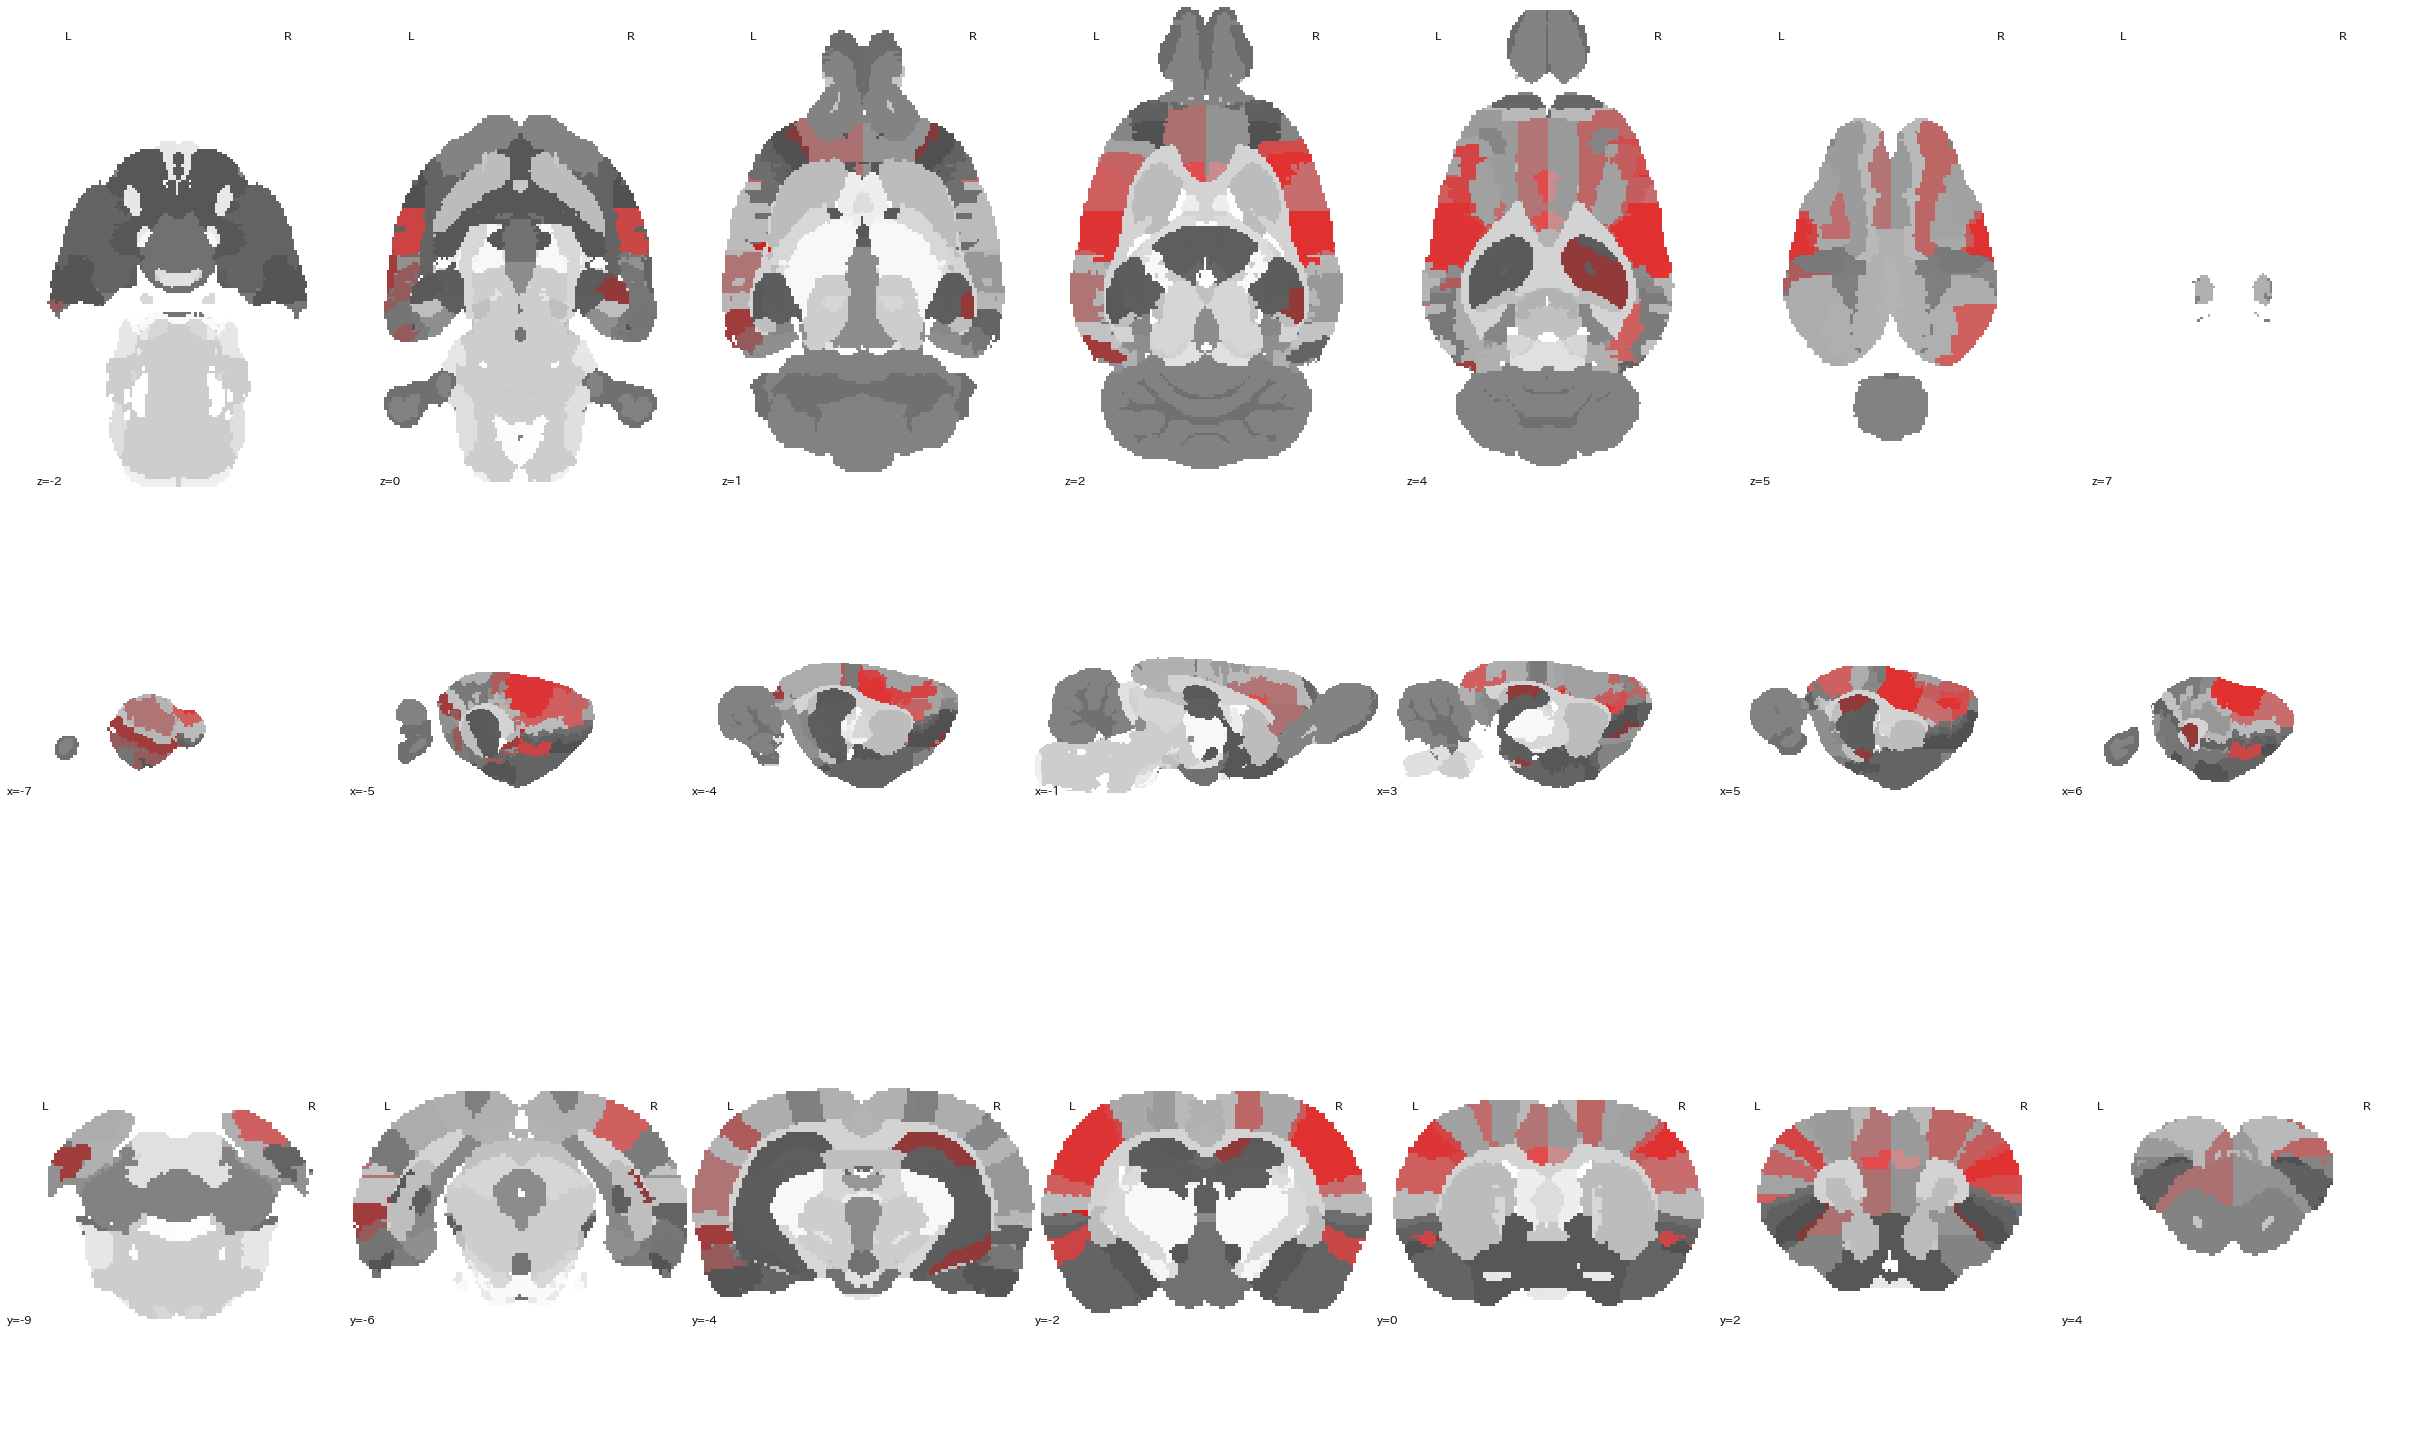

In [72]:
nocorrected = nocorrected.fillna(0)
ages = [x if x>0 else 0 for x in nocorrected.age]
nocorrected['age'] = ages
data = np.zeros(atlas_data.shape, dtype=np.float32)
cluster = list(nocorrected.age.values[:230]) + [0,0] + list(nocorrected.age.values[230:])
for i,n in enumerate(nodes[1:]):
    if i <= 230:
        if anatomical['Territories'].values[i] == 'Cortex':
            data[atlas_data == n] = cluster[i]
    elif i > 232:
        if anatomical['Territories'].values[i-2] == 'Cortex':
            data[atlas_data == n] = cluster[i]
new_img = nib.Nifti1Image(data, atlas.affine, atlas.header)
plotting.plot_roi(new_img, bg_img=template, black_bg=False, threshold=1e-5,  cmap=plotting.cm.red_transparent_full_alpha_range, vmin=0.00, vmax=0.1, display_mode='mosaic') #, output_file='../figures/Fig1E_nocorrected.eps')